In [1]:
if_colab = False

In [3]:
if if_colab:
    from google.colab import drive
    drive.mount('/content/drive')

In [5]:
import sys
if if_colab:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    sys.path.append('/content/gdrive/MyDrive/MLNBD/Project')
import numpy as np

import pandas as pd

In [7]:
import pandas as pd

In [9]:
# Replace the path with the full path to your CSV file in Google Drive
file_path_1= 'Train/trial_info.csv'
file_path_2= 'Train/data.csv'
units = "processed_data/Train_Units.csv"

# Read the CSV file
trials_info = pd.read_csv(file_path_1)
data = pd.read_csv(file_path_2)
units = pd.read_csv(units)



/var/folders/l2/4b20dxd9281c13zvbdsb1yfr0000gn/T/ipykernel_14716/3903286249.py:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path_2)


In [11]:
trials_info

,trial_id,start_time,end_time,trial_type,trial_version,maze_id,success,target_on_time,go_cue_time,move_onset_time,rt,delay,num_targets,target_pos,num_barriers,barrier_pos,active_target,split
0,0,0 days 00:00:00,0 days 00:00:03.421000,11,1,76,True,0 days 00:00:00.848000,0 days 00:00:01.413000,0 days 00:00:02.171000,758,565,1,[[-118 -83]],9,[[ -33 47 37 6]\n [ -77 48 61 11]...,0,val
1,1,0 days 00:00:03.500000,0 days 00:00:05.631000,12,0,77,True,0 days 00:00:04.176000,0 days 00:00:04.324000,0 days 00:00:04.580000,256,148,1,[[-77 82]],0,[],0,train
2,2,0 days 00:00:05.700000,0 days 00:00:08.536000,4,1,4,True,0 days 00:00:06.359000,0 days 00:00:06.540000,0 days 00:00:06.910000,370,181,1,[[-100 35]],9,[[ 100 38 63 14]\n [-146 90 54 10]...,0,train
3,3,0 days 00:00:08.600000,0 days 00:00:11.746000,8,2,10,True,0 days 00:00:09.361000,0 days 00:00:10.259000,0 days 00:00:10.607000,348,898,3,[[-92 81]\n [-91 -70]\n [117 15]],9,[[-119 48 72 8]\n [ -47 68 9 20]...,1,val
4,4,0 days 00:00:11.800000,0 days 00:00:14.706000,7,2,8,True,0 days 00:00:12.593000,0 days 00:00:13.225000,0 days 00:00:13.550000,325,632,3,[[-92 81]\n [-91 -70]\n [117 15]],9,[[-119 48 72 8]\n [ -47 68 9 20]...,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0 days 00:04:38.600000,0 days 00:04:42.021000,11,2,76,True,0 days 00:04:39.552000,0 days 00:04:40.500000,0 days 00:04:40.837000,337,948,3,[[ 133 -81]\n [-118 -83]\n [ -77 82]],9,[[ -33 47 37 6]\n [ -77 48 61 11]...,1,val
96,96,0 days 00:04:42.100000,0 days 00:04:44.466000,4,0,4,True,0 days 00:04:42.963000,0 days 00:04:43.161000,0 days 00:04:43.427000,266,198,1,[[-100 35]],0,[],0,train
97,97,0 days 00:04:44.500000,0 days 00:04:47.376000,3,2,3,True,0 days 00:04:45.410000,0 days 00:04:45.892000,0 days 00:04:46.242000,350,482,3,[[-100 35]\n [ 125 -64]\n [ 104 80]],9,[[ 100 38 63 14]\n [-146 90 54 10]...,1,val
98,98,0 days 00:04:47.400000,0 days 00:04:50.736000,3,1,3,True,0 days 00:04:48.323000,0 days 00:04:49.238000,0 days 00:04:49.545000,307,915,1,[[125 -64]],9,[[ 100 38 63 14]\n [-146 90 54 10]...,0,val


In [13]:
if 'split' in trials_info.columns:
    print("Unique values in 'split' column:", trials_info['split'].unique())

    # Split the data based on the 'split' column
    train_data = trials_info[trials_info['split'] == 'train']
    val_data = trials_info[trials_info['split'] == 'val']

    # Display the sizes of each split for verification
    print("Train data size:", train_data.shape)
    print("Validation data size:", val_data.shape)
else:
    print("Column 'split' not found in the dataset.")

Unique values in 'split' column: ['val' 'train']
Train data size: (75, 18)
Validation data size: (25, 18)


In [15]:
data

,cursor_pos,cursor_pos.1,eye_pos,eye_pos.1,hand_pos,hand_pos.1,hand_vel,hand_vel.1,spikes,spikes.1,...,spikes.132,spikes.133,spikes.134,spikes.135,spikes.136,spikes.137,spikes.138,spikes.139,spikes.140,spikes.141
0,x,y,x,y,x,y,x,y,1011.0,1012.0,...,2791.0,2792.0,2801.0,2802.0,2812.0,2821.0,2841.0,2842.0,2861.0,2951.0
1,-2.445708618379075,1.8065088368179838,-6.421205432173423,-3.32822204584011,-2.4405554624695927,-19.139818095914062,1.4558510204171045,-7.24352780814687,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.355809171967876,3.254141150437025,-11.175378707559513,-6.648509404180358,-4.40853879540083,-34.699939160532125,2.466626500709493,-13.737303750019215,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.806003535898849,2.7645346453592574,-9.97940827057744,-5.538807029624762,-3.858295468876917,-30.52783519273484,1.3050498309123895,-11.606274596470566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.131651046760463,2.992293143066401,-10.582643874251966,-6.063008450465178,-4.173919478547863,-33.0875729073394,0.06125063353368079,-11.42601324323032,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,-113.721973,-77.212775,-126.272415,-121.350473,-113.711828,-111.346775,-1.494996,9.064053,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58731,-120.190982,-81.605331,-136.032094,-128.317058,-120.197662,-117.622308,-2.881756,11.095358,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58732,-110.952083,-75.40675,-123.288717,-118.62554,-111.06973,-108.633383,-3.111111,9.703449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58733,-126.4276,-85.79146,-140.748908,-134.634856,-126.562821,-123.719133,-2.608234,6.402601,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


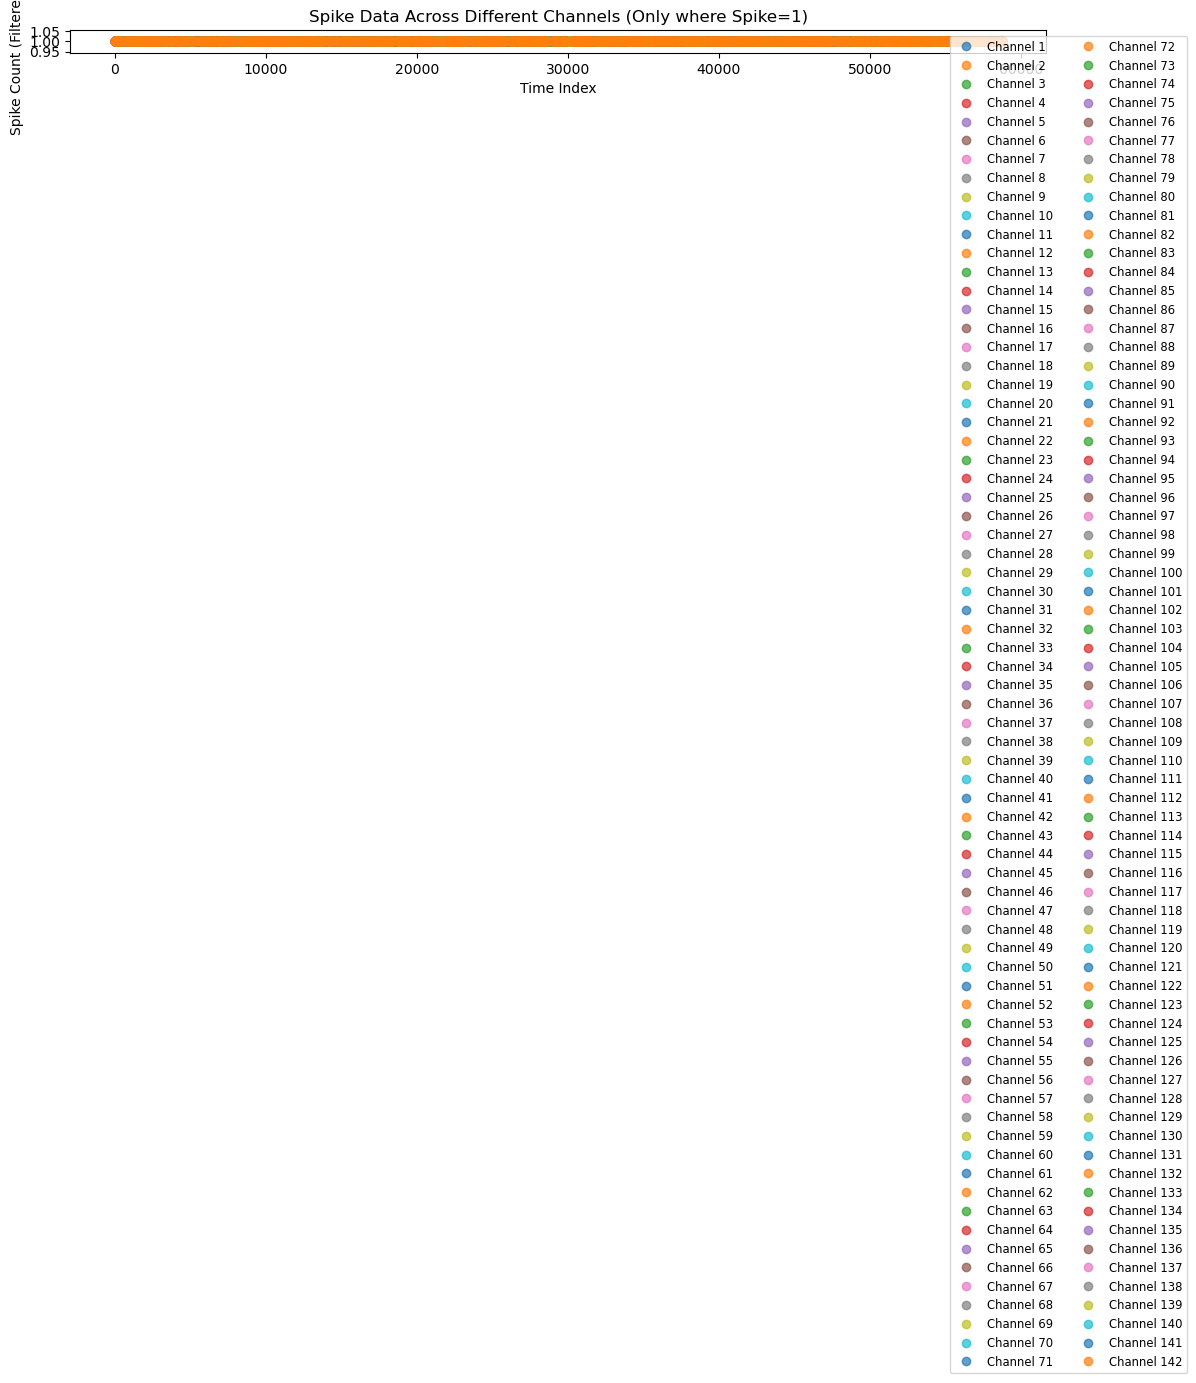

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (adjust file paths as needed)
data_df = data

# Extract spike columns
spike_columns = [col for col in data_df.columns if 'spikes' in col]
spike_data = data_df[spike_columns]

# Plot spike data with a different color for each channel, but only when the value is 1
plt.figure(figsize=(12, 8))
for idx, col in enumerate(spike_columns):
    # Filter to plot only where the value is 1
    plt.plot(spike_data.index[spike_data[col] == 1], spike_data[col][spike_data[col] == 1],
             label=f'Channel {idx + 1}', alpha=0.7, linestyle='', marker='o')

# Labeling the plot
plt.xlabel('Time Index')
plt.ylabel('Spike Count (Filtered for 1)')
plt.title('Spike Data Across Different Channels (Only where Spike=1)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small', ncol=2)
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
!pip install nlb_tools

  Using cached pandas-1.3.4-cp312-cp312-macosx_11_0_arm64.whl
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.0 requires pandas>=2, but you have pandas 1.3.4 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.4 which is incompatible.
xarray 2023.6.0 requires pandas>=1.4, but you have pandas 1.3.4 which is incompatible.


In [20]:
from nlb_tools.nwb_interface import NWBDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
dataset = NWBDataset("Original_Data/sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb", split_heldout=False)
# dataset.resample(5)

/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [21]:
data

,cursor_pos,cursor_pos.1,eye_pos,eye_pos.1,hand_pos,hand_pos.1,hand_vel,hand_vel.1,spikes,spikes.1,...,spikes.132,spikes.133,spikes.134,spikes.135,spikes.136,spikes.137,spikes.138,spikes.139,spikes.140,spikes.141
0,x,y,x,y,x,y,x,y,1011.0,1012.0,...,2791.0,2792.0,2801.0,2802.0,2812.0,2821.0,2841.0,2842.0,2861.0,2951.0
1,-2.445708618379075,1.8065088368179838,-6.421205432173423,-3.32822204584011,-2.4405554624695927,-19.139818095914062,1.4558510204171045,-7.24352780814687,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.355809171967876,3.254141150437025,-11.175378707559513,-6.648509404180358,-4.40853879540083,-34.699939160532125,2.466626500709493,-13.737303750019215,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.806003535898849,2.7645346453592574,-9.97940827057744,-5.538807029624762,-3.858295468876917,-30.52783519273484,1.3050498309123895,-11.606274596470566,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.131651046760463,2.992293143066401,-10.582643874251966,-6.063008450465178,-4.173919478547863,-33.0875729073394,0.06125063353368079,-11.42601324323032,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,-113.721973,-77.212775,-126.272415,-121.350473,-113.711828,-111.346775,-1.494996,9.064053,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58731,-120.190982,-81.605331,-136.032094,-128.317058,-120.197662,-117.622308,-2.881756,11.095358,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
58732,-110.952083,-75.40675,-123.288717,-118.62554,-111.06973,-108.633383,-3.111111,9.703449,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58733,-126.4276,-85.79146,-140.748908,-134.634856,-126.562821,-123.719133,-2.608234,6.402601,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


       spikes  spikes.1  spikes.2  spikes.3  spikes.4  spikes.5  spikes.6  \
0      1011.0    1012.0    1021.0    1022.0    1031.0    1032.0    1041.0   
1         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...       ...       ...       ...       ...       ...       ...       ...   
58730     0.0       0.0       0.0       0.0       0.0       0.0       0.0   
58731     0.0       0.0       0.0       0.0       0.0       0.0       0.0   
58732     0.0       0.0       0.0       0.0       0.0       0.0       0.0   
58733     0.0       0.0       0.0       0.0       0.0       0.0       0.0   
58734     0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       spikes.7  spikes.8  spikes.9  ...  spikes.132  spikes.133  spikes.13

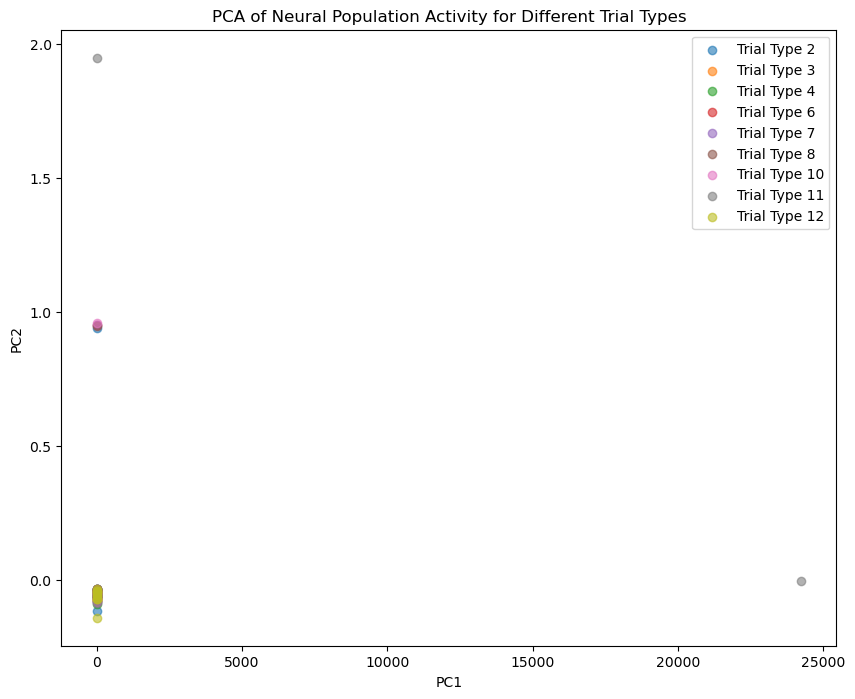

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data (spike counts or firing rates) - assuming 'data.csv' has trial-separated population activity
data_df = data
data_df = data_df.fillna(0)
# Extract spike data for each channel (neuron) and timepoint per trial
spike_columns = [col for col in data_df.columns if 'spikes' in col]
print(data_df[spike_columns])
population_activity = data_df[spike_columns].values  # assuming each row is a trial

# Apply PCA
pca = PCA(n_components=10)  # De-noised 10-dimensional neural state
population_activity_pca = pca.fit_transform(population_activity)

# Plot the first three principal components for different trial types
# Assuming 'trial_info.csv' has labels for trial types (e.g., left or right targets)
trial_info_df = trials_info
trial_types = trial_info_df['trial_type'].values  # Replace with appropriate column name

plt.figure(figsize=(10, 8))
for trial_type in set(trial_types):
    # Filter trials for this specific type
    trial_indices = [i for i, t in enumerate(trial_types) if t == trial_type]
    plt.scatter(population_activity_pca[trial_indices, 0],
                population_activity_pca[trial_indices, 1],
                label=f'Trial Type {trial_type}', alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Neural Population Activity for Different Trial Types')
plt.legend()
plt.show()



In [23]:
population_activity

array([[1.011e+03, 1.012e+03, 1.021e+03, ..., 2.842e+03, 2.861e+03,
        2.951e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

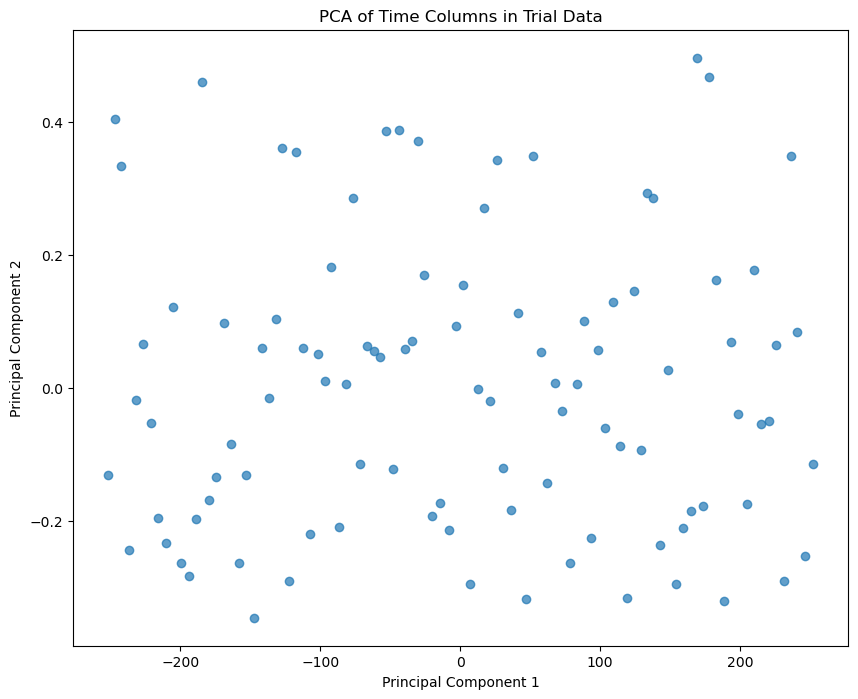

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the trial info data
trial_info_df = trials_info

# Convert time columns to seconds
time_columns = [ 'target_on_time', 'go_cue_time', 'move_onset_time']
for col in time_columns:
    trial_info_df[col] = pd.to_timedelta(trial_info_df[col]).dt.total_seconds()

# Extract the time columns for PCA
time_data = trial_info_df[time_columns].fillna(0)  # Replace any NaN values with 0

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
time_data_pca = pca.fit_transform(time_data)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(time_data_pca[:, 0], time_data_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Time Columns in Trial Data')
plt.show()


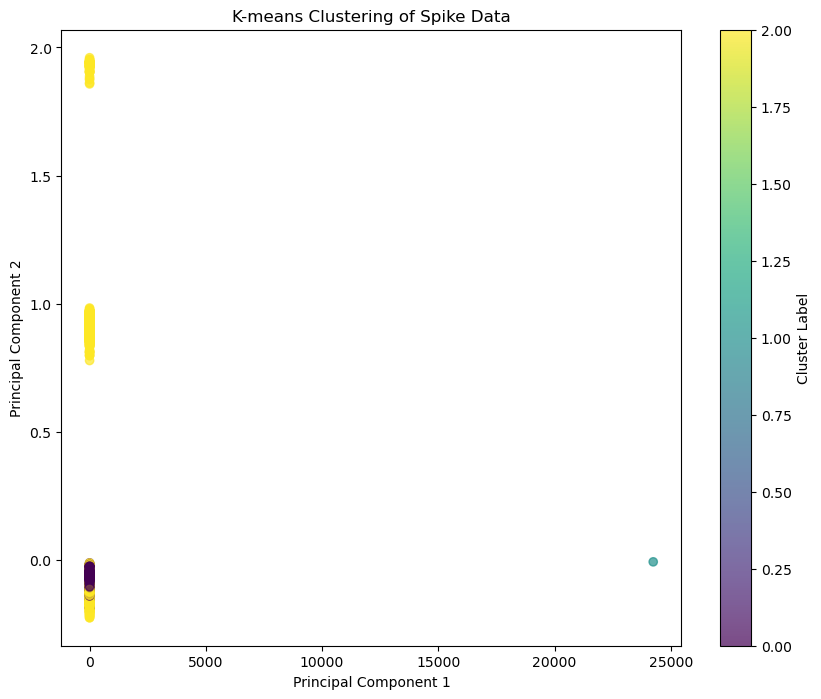

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the spike data
data_df = data

# Select spike columns
spike_columns = [col for col in data_df.columns if 'spikes' in col]
spike_data = data_df[spike_columns].fillna(0)  # Replace any NaNs with 0

# Apply PCA to reduce dimensions (optional but helps with visualization)
pca = PCA(n_components=2)
spike_data_pca = pca.fit_transform(spike_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(spike_data)

# Plot the clusters in the PCA-reduced space
plt.figure(figsize=(10, 8))
plt.scatter(spike_data_pca[:, 0], spike_data_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Spike Data')
plt.colorbar(label='Cluster Label')
plt.show()


In [26]:
!pip install PyWavelets


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Load the data files
neural_data = data
trial_info = trials_info

# Extract neural spike columns as features
spike_columns = [col for col in neural_data.columns if 'spikes' in col]
X = neural_data[spike_columns].dropna().astype(float)

# Label data based on trial type - create binary classification
# Assuming trial_type values below 10 indicate 'left' (0) and above 10 indicate 'right' (1)
trial_info = trial_info.dropna(subset=['trial_type'])
y = trial_info['trial_type'].apply(lambda x: 0 if x < 10 else 1).iloc[:X.shape[0]]  # Binary labeling

# Align neural data with trial information
aligned_neural_data = X.iloc[:len(trial_info)]
aligned_labels = y.iloc[:len(aligned_neural_data)]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(aligned_neural_data, aligned_labels, test_size=0.3, random_state=42)

# Initialize and train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions
y_pred = lda.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.57      0.29      0.38        14

    accuracy                           0.57        30
   macro avg       0.57      0.55      0.52        30
weighted avg       0.57      0.57      0.53        30



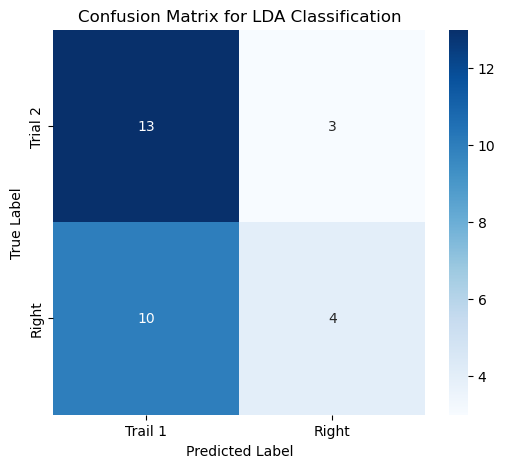

In [28]:
# Make predictions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = lda.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Trail 1', 'Right'], yticklabels=['Trial 2', 'Right'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LDA Classification')
plt.show()

In [ ]:
cursor = np.load('/content/gdrive/MyDrive/MLNBD/ML_Neuro/behaviour_data/cursor_posdata.npy')
cursor.shape

(287710, 2)

In [ ]:
timestamps[4]

0.004

In [ ]:
import pandas as pd
import numpy as np

# Load the data CSV and timestamps file
data_df = data
timestamps = np.load('/content/gdrive/MyDrive/MLNBD/ML_Neuro/behaviour_data/cursor_postimestamp.npy')

# Ensure timestamps align with the data DataFrame row count
if len(timestamps) == len(data_df):
    # Add timestamps as a new column in data_df
    data_df['timestamp'] = timestamps
else:
    raise ValueError("The number of timestamps does not match the number of rows in data.csv.")

# Load the trial information file to associate rows with trial intervals
trial_info_df = trials_info
trial_info_df['start_time_seconds'] = pd.to_timedelta(trial_info_df['start_time']).dt.total_seconds()
trial_info_df['end_time_seconds'] = pd.to_timedelta(trial_info_df['end_time']).dt.total_seconds()

# Initialize a column in data_df for trial ID association
data_df['trial_id'] = None

# Iterate over each trial to label rows in data_df based on the trial intervals
for _, trial in trial_info_df.iterrows():
    trial_id = trial['trial_id']
    start_time = trial['start_time_seconds']
    end_time = trial['end_time_seconds']

    # Label rows within the current trial's interval
    mask = (data_df['timestamp'] >= start_time) & (data_df['timestamp'] <= end_time)
    data_df.loc[mask, 'trial_id'] = trial_id

# Save the updated DataFrame to a new file or display as needed
data_df.to_csv('data_with_timestamps_and_trials.csv', index=False)


ValueError: The number of timestamps does not match the number of rows in data.csv.

**VAEEE**

In [ ]:
!pip3 install torch torchvision

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
spike_data = data
spike_columns = [col for col in spike_data.columns if "spikes" in col]
spike_matrix = spike_data[spike_columns].astype(float)

# Handle missing values by filling with the mean of each column
spike_matrix.fillna(spike_matrix.mean(), inplace=True)

# Standardize data
scaler = StandardScaler()
spike_matrix = scaler.fit_transform(spike_matrix)

# Define VAE parameters
original_dim = spike_matrix.shape[1]
latent_dim = 40  # Dimension of encoding space
intermediate_dim = 128  # Intermediate layer dimension

# Define VAE encoder network
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Define VAE decoder network
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Define VAE loss
reconstruction_loss = mse(inputs, x_decoded_mean) * original_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train VAE
vae.fit(spike_matrix, epochs=50, batch_size=32, validation_split=0.2)

# Create encoder model to get latent representations
encoder = Model(inputs, z_mean)

# Encode spike data to 40-dimensional latent space
encoded_spike_data = encoder.predict(spike_matrix)
encoded_df = pd.DataFrame(encoded_spike_data, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load and preprocess the data
spike_data = data
spike_columns = [col for col in spike_data.columns if "spikes" in col]
spike_matrix = spike_data[spike_columns].astype(float)

# Fill missing values with 0
spike_matrix.fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
spike_matrix = scaler.fit_transform(spike_matrix)

# Convert to PyTorch tensors
data_tensor = torch.tensor(spike_matrix, dtype=torch.float32)
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# VAE model parameters
original_dim = spike_matrix.shape[1]
latent_dim = 40  # Dimension of the latent space
hidden_dim = 128  # Dimension of intermediate hidden layers

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_log_var = nn.Linear(hidden_dim, latent_dim)

        # Decoder layers
        self.fc2 = nn.Linear(latent_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        log_var = torch.clamp(self.fc_log_var(h), min=-10, max=10)  # Clamping for stability
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc2(z))
        return torch.sigmoid(self.fc3(h))

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

# Instantiate and set up the VAE model
vae = VAE(input_dim=original_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-4)  # Reduced learning rate for stability

# Loss function
def vae_loss(recon_x, x, mu, log_var):
    reconstruction_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + kl_divergence

# Training loop
epochs = 50
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        x, = batch
        optimizer.zero_grad()
        recon_x, mu, log_var = vae(x)
        loss = vae_loss(recon_x, x, mu, log_var)

        # Check for NaNs in the loss
        if torch.isnan(loss).any():
            print("NaN detected in loss, stopping training.")
            break

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(dataloader.dataset):.4f}")


Epoch 1, Loss: 151.3132
Epoch 2, Loss: 146.2608
Epoch 3, Loss: 145.4696
Epoch 4, Loss: 145.7764
Epoch 5, Loss: 145.6034
Epoch 6, Loss: 145.3561
Epoch 7, Loss: 145.2481
Epoch 8, Loss: 145.2441
Epoch 9, Loss: 144.9953
Epoch 10, Loss: 144.9435
Epoch 11, Loss: 144.9514
Epoch 12, Loss: 144.9629
Epoch 13, Loss: 144.6284
Epoch 14, Loss: 145.3437
Epoch 15, Loss: 145.2802
Epoch 16, Loss: 145.5725
Epoch 17, Loss: 145.0743
Epoch 18, Loss: 145.5646
Epoch 19, Loss: 145.1622
Epoch 20, Loss: 144.6859
Epoch 21, Loss: 144.7472
Epoch 22, Loss: 144.7728
Epoch 23, Loss: 144.6460
Epoch 24, Loss: 145.1526
Epoch 25, Loss: 145.1808
Epoch 26, Loss: 145.2716
Epoch 27, Loss: 146.4083
Epoch 28, Loss: 145.5430
Epoch 29, Loss: 145.1983
Epoch 30, Loss: 145.9119
Epoch 31, Loss: 145.5618
Epoch 32, Loss: 145.4029
Epoch 33, Loss: 145.3147
Epoch 34, Loss: 145.5973
Epoch 35, Loss: 145.5231
Epoch 36, Loss: 146.3210
Epoch 37, Loss: 145.5960
Epoch 38, Loss: 145.3656
Epoch 39, Loss: 145.4739
Epoch 40, Loss: 144.9857
Epoch 41,

In [8]:
# Set the model to evaluation mode
vae.eval()

# Obtain encodings for the entire dataset
with torch.no_grad():
    mu, _ = vae.encode(data_tensor)
    encoded_spike_data = mu.numpy()  # Convert to numpy for easy handling if needed

# Convert to DataFrame for easier analysis and inspection
encoded_df = pd.DataFrame(encoded_spike_data, columns=[f'latent_dim_{i+1}' for i in range(latent_dim)])

# Display the first few rows of the encoding
print(encoded_df.shape)


(58735, 40)


In [9]:
from google.colab import files

# Save the DataFrame to a CSV file
encoded_df.to_csv('encoded_spike_data.csv', index=False)

# Download the file
files.download('encoded_spike_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Seperate plan and execution csvs

In [39]:
from pynwb import NWBHDF5IO

def safe_getattr(obj, attr, default=None):
    """
    Safely get an attribute, avoiding errors if the attribute doesn't exist.
    """
    return getattr(obj, attr, default) if hasattr(obj, attr) else default

def recursively_explore(obj, level=0):
    """
    Recursively explores and prints all attributes in an NWB object or field.
    """
    indent = "  " * level
    print(f"{indent}- {type(obj)}: {obj}")

    # Check if the object has fields
    if hasattr(obj, "fields") and isinstance(obj.fields, dict):
        print(f"{indent}  Fields:")
        for key, value in obj.fields.items():
            print(f"{indent}    - {key}: {type(value)}")
            recursively_explore(value, level + 1)
    # Check if the object is a dictionary
    elif isinstance(obj, dict):
        print(f"{indent}  Dictionary:")
        for key, value in obj.items():
            print(f"{indent}    - {key}: {type(value)}")
            recursively_explore(value, level + 1)
    # Check if the object is a list or tuple
    elif isinstance(obj, (list, tuple)):
        print(f"{indent}  List or Tuple:")
        for idx, item in enumerate(obj):
            print(f"{indent}    - Item {idx}: {type(item)}")
            recursively_explore(item, level + 1)
    # If none of the above, treat as primitive or unsupported
    else:
        print(f"{indent}  Primitive or unsupported type: {obj}")

def explore_nwb_file(nwbfile):
    """
    Dynamically explores and prints all data in the NWB file.
    """
    print("Exploring NWB File...\n")
    print(f"Identifier: {nwbfile.identifier}")
    print(f"Session start time: {nwbfile.session_start_time}")
    print(f"Experiment description: {safe_getattr(nwbfile, 'experiment_description', 'N/A')}\n")
    print("Top-level fields in the NWB file:")
    recursively_explore(nwbfile)

# Load the NWB file
nwb_file_path = "Original_Data/sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb"

with NWBHDF5IO(nwb_file_path, mode='r') as io:
    nwbfile = io.read()
    explore_nwb_file(nwbfile)

/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Exploring NWB File...

Identifier: 76ff7eba-0b93-11ec-a90d-3da92aaa0e59
Session start time: 2009-09-28 00:00:00-07:00
Experiment description: Center-out delayed reaching task with maze barriers.

Top-level fields in the NWB file:
- <class 'pynwb.file.NWBFile'>: root pynwb.file.NWBFile at 0x5281179232
Fields:
  devices: {
    electrode_array_M1 <class 'pynwb.device.Device'>,
    electrode_array_PMd <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    electrode_group_M1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    electrode_group_PMd <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: Center-out delayed reaching task with maze barriers.
  experimenter: ['Mark M. Churchland' 'Matthew T. Kaufman']
  file_create_date: [datetime.datetime(2021, 9, 1, 22, 14, 12, 620183, tzinfo=tzoffset(None, -14400))]
  identifier: 76ff7eba-0b93-11ec-a90d-3da92aaa0e59
  institution: Stanford University
  intervals: {
    

In [51]:
import pandas as pd
import numpy as np
import re
import ast
from datetime import timedelta
from pynwb import NWBHDF5IO

# Load NWB file
file_path = 'Original_Data/sub-Jenkins_ses-small_desc-train_behavior+ecephys.nwb'
io = NWBHDF5IO(file_path, mode='r')
nwbfile = io.read()

# Extract trials and units
trials = nwbfile.trials.to_dataframe()
units = nwbfile.units.to_dataframe()

# Function to clean spike times
def clean_spike_times(spike_time_str):
    if isinstance(spike_time_str, str):
        cleaned_str = re.sub(r'\s+', ' ', spike_time_str.replace('\n', ''))
        cleaned_str = re.sub(r'\.\.\.|,$', '', cleaned_str)
        cleaned_str = re.sub(r'(?<=\d)\s+(?=\d)', ', ', cleaned_str)
        try:
            return np.array(ast.literal_eval(cleaned_str))
        except (ValueError, SyntaxError):
            return np.array([])
    return spike_time_str

# Apply cleaning to spike times
units['spike_times'] = units['spike_times'].apply(clean_spike_times)

# Extract spike counts for planning and execution phases
planning_phase_data = []
execution_phase_data = []

for _, trial in trials.iterrows():
    trial_id = trial.name
    start_time = timedelta(seconds=trial['start_time']).total_seconds()
    go_cue_time = timedelta(seconds=trial['go_cue_time']).total_seconds()
    stop_time = timedelta(seconds=trial['stop_time']).total_seconds()

    # Planning phase: before go cue
    planning_spikes = []
    for _, unit in units.iterrows():
        spike_times = unit['spike_times']  # Cleaned spike times
        spike_count = np.sum((spike_times >= start_time) & (spike_times < go_cue_time))
        planning_spikes.append(spike_count)
    planning_phase_data.append({
        'trial_id': trial_id,
        'phase': 'planning',
        'region': 'PMd',
        'mean_activity': np.mean(planning_spikes) if planning_spikes else 0,
        'max_activity': np.max(planning_spikes) if planning_spikes else 0,
        'activity_variance': np.var(planning_spikes) if planning_spikes else 0,
        'start_time': start_time,
        'end_time': go_cue_time,
        'spike_counts': planning_spikes
    })

    # Execution phase: between go cue and movement onset
    execution_spikes = []
    for _, unit in units.iterrows():
        spike_times = unit['spike_times']  # Cleaned spike times
        spike_count = np.sum((spike_times >= go_cue_time) & (spike_times < stop_time))
        execution_spikes.append(spike_count)
    execution_phase_data.append({
        'trial_id': trial_id,
        'phase': 'execution',
        'region': 'M1',
        'mean_activity': np.mean(execution_spikes) if execution_spikes else 0,
        'max_activity': np.max(execution_spikes) if execution_spikes else 0,
        'activity_variance': np.var(execution_spikes) if execution_spikes else 0,
        'start_time': go_cue_time,
        'end_time': stop_time,
        'spike_counts': execution_spikes
    })

# Convert to DataFrames
planning_df = pd.DataFrame(planning_phase_data)
execution_df = pd.DataFrame(execution_phase_data)

# Save CSV files
output_dir = 'processed_data'
planning_csv_path = '/Users/aarushidhanuka/Desktop/ML_Neuro/processed_data/planning_phase.csv'
execution_csv_path ='/Users/aarushidhanuka/Desktop/ML_Neuro/processed_data/execution_phase.csv'
# planning_csv_path = f'{output_dir}/planning_phase.csv'
# execution_csv_path = f'{output_dir}/execution_phase.csv'
# /Users/aarushidhanuka/Desktop/ML_Neuro/processed_data 

planning_df.to_csv(planning_csv_path, index=False)
execution_df.to_csv(execution_csv_path, index=False)
print(planning_df)

# Close NWB file
io.close()

print(f"Planning phase data saved to {planning_csv_path}")
print(f"Execution phase data saved to {execution_csv_path}")


/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/anaconda3/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


    trial_id     phase region  mean_activity  max_activity  activity_variance  \
0          0  planning    PMd       3.676056            20          19.247173   
1          1  planning    PMd       2.260563            15           9.122248   
2          2  planning    PMd       2.598592            16           8.578308   
3          3  planning    PMd       4.978873            27          30.626314   
4          4  planning    PMd       4.838028            28          34.107568   
..       ...       ...    ...            ...           ...                ...   
95        95  planning    PMd       5.852113            33          40.055594   
96        96  planning    PMd       4.021127            19          19.203779   
97        97  planning    PMd       3.992958            21          19.697134   
98        98  planning    PMd       5.232394            31          41.840359   
99        99  planning    PMd       4.183099            20          25.093235   

    start_time  end_time   

In [49]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nlb-tools 0.0.4 requires pandas<=1.3.4,>=1.0.0, but you have pandas 2.2.3 which is incompatible.


### Classification

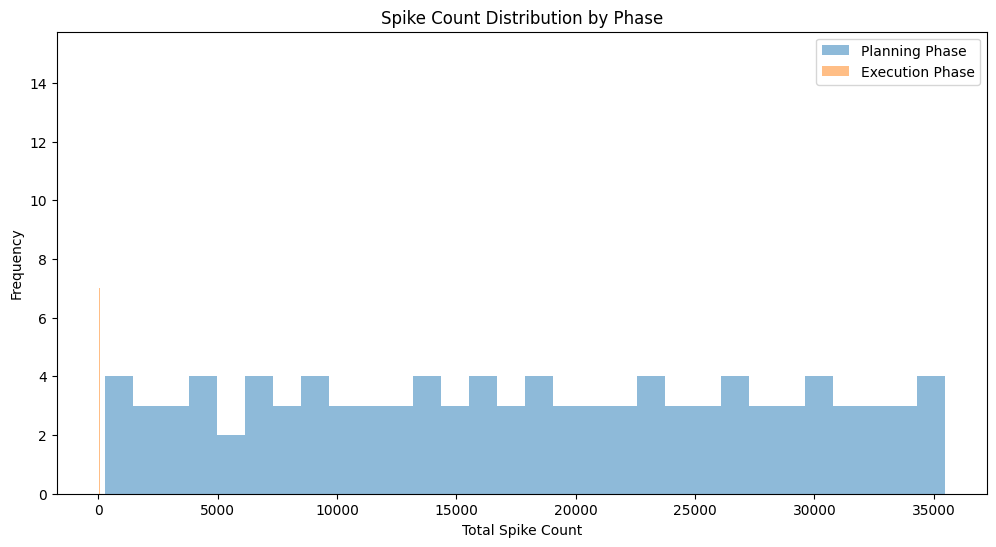

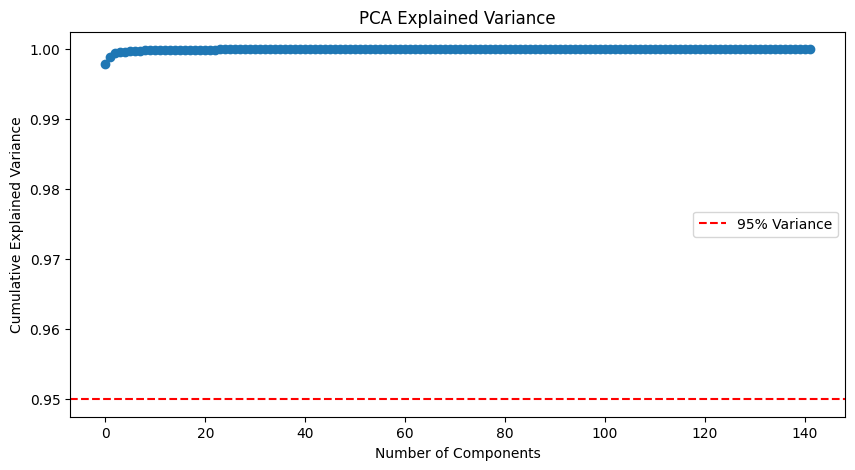

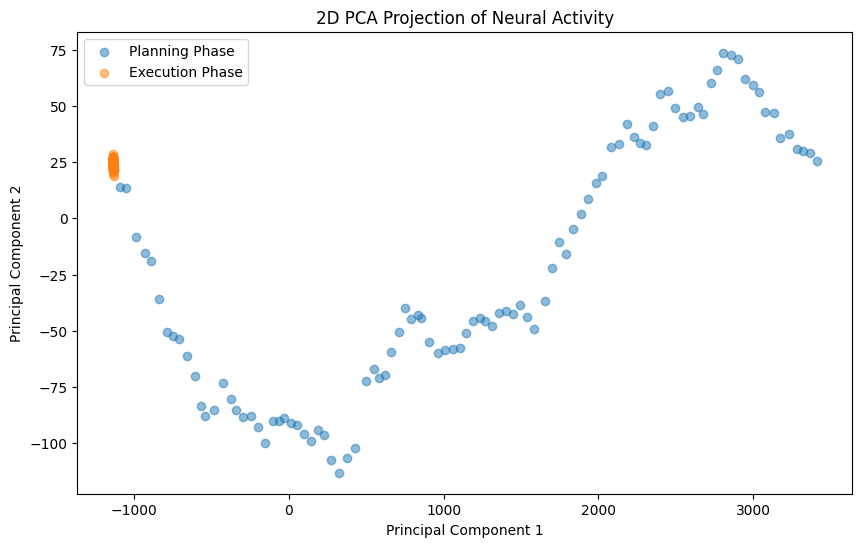

In [ ]:
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Load Data
trial_info = trials_info
train_units = units

# Step 2: Data Cleaning for Spike Times
def clean_spike_times(spike_time_str):
    if isinstance(spike_time_str, str):
        cleaned_str = re.sub(r'\s+', ' ', spike_time_str.replace('\n', ''))
        cleaned_str = re.sub(r'\.\.\.|,$', '', cleaned_str)
        cleaned_str = re.sub(r'(?<=\d)\s+(?=\d)', ', ', cleaned_str)
        try:
            return np.array(ast.literal_eval(cleaned_str))
        except (ValueError, SyntaxError):
            return np.array([])
    return spike_time_str

train_units['spike_times'] = train_units['spike_times'].apply(clean_spike_times)

# Step 3: Feature Extraction for Planning and Execution Phases
trial_times = trial_info[['trial_id', 'go_cue_time', 'move_onset_time']]
X_planning, X_execution, y = [], [], []

for _, trial in trial_times.iterrows():
    go_cue_time = pd.to_timedelta(trial['go_cue_time']).total_seconds()
    move_onset_time = pd.to_timedelta(trial['move_onset_time']).total_seconds()

    planning_spikes, execution_spikes = [], []

    for _, unit in train_units.iterrows():
        spike_times = unit['spike_times']
        planning_spikes.append(np.sum((spike_times >= 0) & (spike_times < go_cue_time)))
        execution_spikes.append(np.sum((spike_times >= go_cue_time) & (spike_times < move_onset_time)))

    X_planning.append(planning_spikes)
    X_execution.append(execution_spikes)
    y.extend([0, 1])

X = np.vstack([X_planning, X_execution])
y = np.array(y)

# Step 4: Data Visualization
# 1. Spike Count Distribution
plt.figure(figsize=(12, 6))
plt.hist(np.sum(X[:len(X)//2], axis=1), bins=30, alpha=0.5, label='Planning Phase')
plt.hist(np.sum(X[len(X)//2:], axis=1), bins=30, alpha=0.5, label='Execution Phase')
plt.xlabel('Total Spike Count')
plt.ylabel('Frequency')
plt.title('Spike Count Distribution by Phase')
plt.legend()
plt.show()

# 2. PCA Explained Variance
pca = PCA().fit(X)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# 3. 2D PCA Projection
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:len(X)//2, 0], X_pca_2d[:len(X)//2, 1], alpha=0.5, label='Planning Phase')
plt.scatter(X_pca_2d[len(X)//2:, 0], X_pca_2d[len(X)//2:, 1], alpha=0.5, label='Execution Phase')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Neural Activity')
plt.legend()
plt.show()

# Step 5: Dimensionality Reduction and SVM Model Training
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC(kernel='linear'))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Best Validation Accuracy:", best_accuracy)
print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)


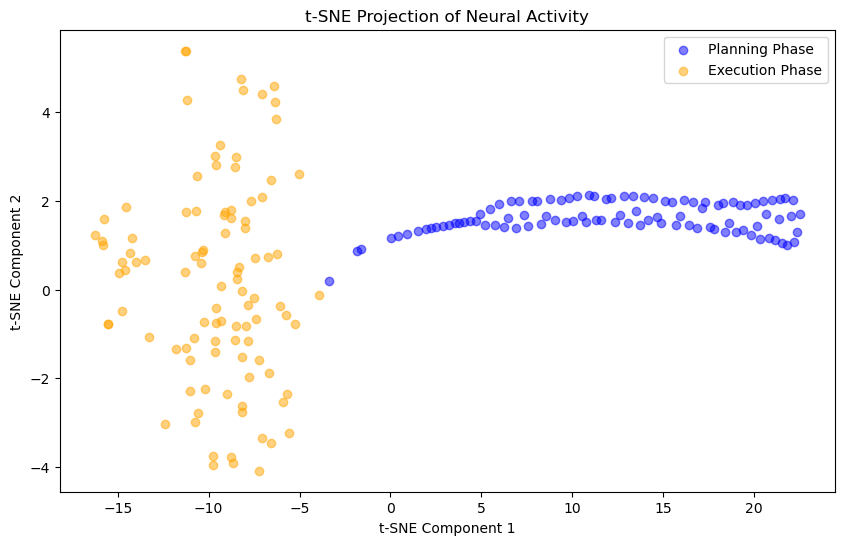

Best Validation Accuracy: 0.50625
Best Parameters: {'svm__C': 0.1}
Test Accuracy: 0.4


In [92]:
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Load Data
trial_info = trials_info
train_units = units

# Step 2: Data Cleaning for Spike Times
def clean_spike_times(spike_time_str):
    if isinstance(spike_time_str, str):
        cleaned_str = re.sub(r'\s+', ' ', spike_time_str.replace('\n', ''))
        cleaned_str = re.sub(r'\.\.\.|,$', '', cleaned_str)
        cleaned_str = re.sub(r'(?<=\d)\s+(?=\d)', ', ', cleaned_str)
        try:
            return np.array(ast.literal_eval(cleaned_str))
        except (ValueError, SyntaxError):
            return np.array([])
    return spike_time_str

train_units['spike_times'] = train_units['spike_times'].apply(clean_spike_times)

# Step 3: Feature Extraction for Planning and Execution Phases
trial_times = trial_info[['trial_id', 'go_cue_time', 'move_onset_time']]
X_planning, X_execution, y = [], [], []

for _, trial in trial_times.iterrows():
    go_cue_time = pd.to_timedelta(trial['go_cue_time']).total_seconds()
    move_onset_time = pd.to_timedelta(trial['move_onset_time']).total_seconds()

    planning_spikes, execution_spikes = [], []

    for _, unit in train_units.iterrows():
        spike_times = unit['spike_times']
        planning_spikes.append(np.sum((spike_times >= 0) & (spike_times < go_cue_time)))
        execution_spikes.append(np.sum((spike_times >= go_cue_time) & (spike_times < move_onset_time)))

    X_planning.append(planning_spikes)
    X_execution.append(execution_spikes)
    y.extend([0, 1])  # 0 for planning, 1 for execution

# Combine planning and execution features into a single feature matrix
X = np.vstack([X_planning, X_execution])
y = np.array(y)

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Data Visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:len(X)//2, 0], X_tsne[:len(X)//2, 1], alpha=0.5, label='Planning Phase', c='blue')
plt.scatter(X_tsne[len(X)//2:, 0], X_tsne[len(X)//2:, 1], alpha=0.5, label='Execution Phase', c='orange')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Neural Activity')
plt.legend()
plt.show()

# Step 6: SVM Model Training without Dimensionality Reduction
# We use the original scaled features directly for SVM classification.
pipeline = Pipeline([
    ('svm', SVC(kernel='linear'))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
}

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform grid search with cross-validation to optimize SVM
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Step 7: Evaluate Model on Test Set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Best Validation Accuracy:", best_accuracy)
print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)


SVM

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

# Parse timestamps in trial_info to use as boundaries for planning and execution phases
trial_info_df['go_cue_time'] = pd.to_timedelta(trial_info_df['go_cue_time'])
trial_info_df['move_onset_time'] = pd.to_timedelta(trial_info_df['move_onset_time'])

# Initialize lists for features and labels
features = []
labels = []

# Loop through each trial to extract planning and execution phase data
for _, trial in trial_info_df.iterrows():
    trial_id = trial['trial_id']
    # Planning phase: from start to go_cue_time
    planning_phase = data_df[(data_df.index >= trial['start_time'].seconds) &
                             (data_df.index < trial['go_cue_time'].seconds)]
    # Execution phase: from go_cue_time to move_onset_time
    execution_phase = data_df[(data_df.index >= trial['go_cue_time'].seconds) &
                              (data_df.index < trial['move_onset_time'].seconds)]

    # Extract spike counts or positional features (simplifying here as spike sums)
    # Planning features
    if not planning_phase.empty:
        planning_features = planning_phase.filter(regex='spikes').sum().values
        features.append(planning_features)
        labels.append(0)  # Label for planning

    # Execution features
    if not execution_phase.empty:
        execution_features = execution_phase.filter(regex='spikes').sum().values
        features.append(execution_features)
        labels.append(1)  # Label for execution

# Convert to numpy arrays for model training
features = np.array(features)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)

classification_report_result


AttributeError: 'str' object has no attribute 'seconds'

In [96]:
# Convert timestamp columns to timedelta for accurate indexing
trial_info_df['start_time'] = pd.to_timedelta(trial_info_df['start_time'])
trial_info_df['end_time'] = pd.to_timedelta(trial_info_df['end_time'])
trial_info_df['target_on_time'] = pd.to_timedelta(trial_info_df['target_on_time'])
trial_info_df['go_cue_time'] = pd.to_timedelta(trial_info_df['go_cue_time'])
trial_info_df['move_onset_time'] = pd.to_timedelta(trial_info_df['move_onset_time'])

# Redefine the feature extraction and SVM code now that timestamps are properly formatted
features = []
labels = []

# Loop through each trial to extract planning and execution phase data
for _, trial in trial_info_df.iterrows():
    # Planning phase: from start to go_cue_time
    planning_phase = data_df[(data_df.index >= trial['start_time'].total_seconds()) &
                             (data_df.index < trial['go_cue_time'].total_seconds())]
    # Execution phase: from go_cue_time to move_onset_time
    execution_phase = data_df[(data_df.index >= trial['go_cue_time'].total_seconds()) &
                              (data_df.index < trial['move_onset_time'].total_seconds())]

    # Extract spike counts or positional features
    if not planning_phase.empty:
        planning_features = planning_phase.filter(regex='spikes').sum().values
        features.append(planning_features)
        labels.append(0)  # Label for planning

    if not execution_phase.empty:
        execution_features = execution_phase.filter(regex='spikes').sum().values
        features.append(execution_features)
        labels.append(1)  # Label for execution

# Convert to numpy arrays for model training
features = np.array(features)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)

classification_report_result


'              precision    recall  f1-score   support\n\n           0       0.70      0.95      0.81        20\n           1       0.00      0.00      0.00         8\n\n    accuracy                           0.68        28\n   macro avg       0.35      0.47      0.40        28\nweighted avg       0.50      0.68      0.58        28\n'